In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# EDA

In [2]:
data=pd.read_csv("water_pollution_disease.csv")
data.head(5)

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [4]:
data.isnull().sum()

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [5]:
data=data.drop(["Water Treatment Method"],axis=1)

In [6]:
data.duplicated().sum()

0

In [7]:
le=LabelEncoder()
data["Country"]=le.fit_transform(data["Country"])
data["Region"]=le.fit_transform(data["Region"])
data["Water Source Type"]=le.fit_transform(data["Water Source Type"])

In [8]:
data.corr()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
Country,1.000000,-0.027935,-0.010687,0.029628,-0.005285,-0.005769,0.003423,-0.011977,-0.002942,-0.027904,...,0.014044,-0.034521,-0.004344,0.000827,0.018202,-0.028928,-0.038327,0.014749,-0.029058,-0.003999
Region,-0.027935,1.000000,0.025192,-0.004110,0.007214,0.041944,0.001324,0.019995,0.011922,0.003341,...,-0.014958,-0.018263,-0.029137,0.002070,0.006840,-0.016611,-0.037736,0.010116,0.015250,0.001600
Year,-0.010687,0.025192,1.000000,0.027322,-0.012009,0.002086,0.002336,-0.004248,0.002293,-0.008076,...,-0.030197,0.033197,-0.011524,0.033907,0.003756,0.004420,-0.006379,0.015574,0.007986,0.000411
Water Source Type,0.029628,-0.004110,0.027322,1.000000,0.013010,-0.027890,-0.003842,0.019847,0.030801,-0.018057,...,0.009404,-0.007939,0.014377,-0.020025,0.052172,-0.008206,-0.002635,-0.008958,-0.003516,-0.007515
Contaminant Level (ppm),-0.005285,0.007214,-0.012009,0.013010,1.000000,0.015832,0.012436,0.006122,-0.048365,0.012352,...,0.027019,0.020529,-0.028094,-0.015153,-0.045862,0.002442,0.012094,-0.005317,0.024128,-0.005532
pH Level,-0.005769,0.041944,0.002086,-0.027890,0.015832,1.000000,-0.044292,0.007651,-0.000528,0.022519,...,0.024828,0.011574,0.004177,-0.002972,0.015509,0.017085,-0.047860,-0.001774,-0.007290,-0.001965
Turbidity (NTU),0.003423,0.001324,0.002336,-0.003842,0.012436,-0.044292,1.000000,-0.000677,0.021619,-0.022772,...,0.021453,-0.002389,0.006440,-0.015601,0.001364,-0.004110,0.030491,0.006596,0.007078,0.006886
Dissolved Oxygen (mg/L),-0.011977,0.019995,-0.004248,0.019847,0.006122,0.007651,-0.000677,1.000000,-0.033023,0.021765,...,-0.017889,0.041853,-0.018998,-0.015512,-0.001830,-0.001918,0.019067,-0.007434,0.008028,-0.010568
Nitrate Level (mg/L),-0.002942,0.011922,0.002293,0.030801,-0.048365,-0.000528,0.021619,-0.033023,1.000000,0.010875,...,0.007948,-0.007345,0.037444,0.012970,0.029534,0.004033,-0.006235,0.016400,0.013920,-0.011292
Lead Concentration (µg/L),-0.027904,0.003341,-0.008076,-0.018057,0.012352,0.022519,-0.022772,0.021765,0.010875,1.000000,...,0.018696,0.012994,-0.012964,0.016625,0.000638,0.015852,0.009590,-0.006791,0.004307,-0.002754


In [9]:
sns.set(style='whitegrid')

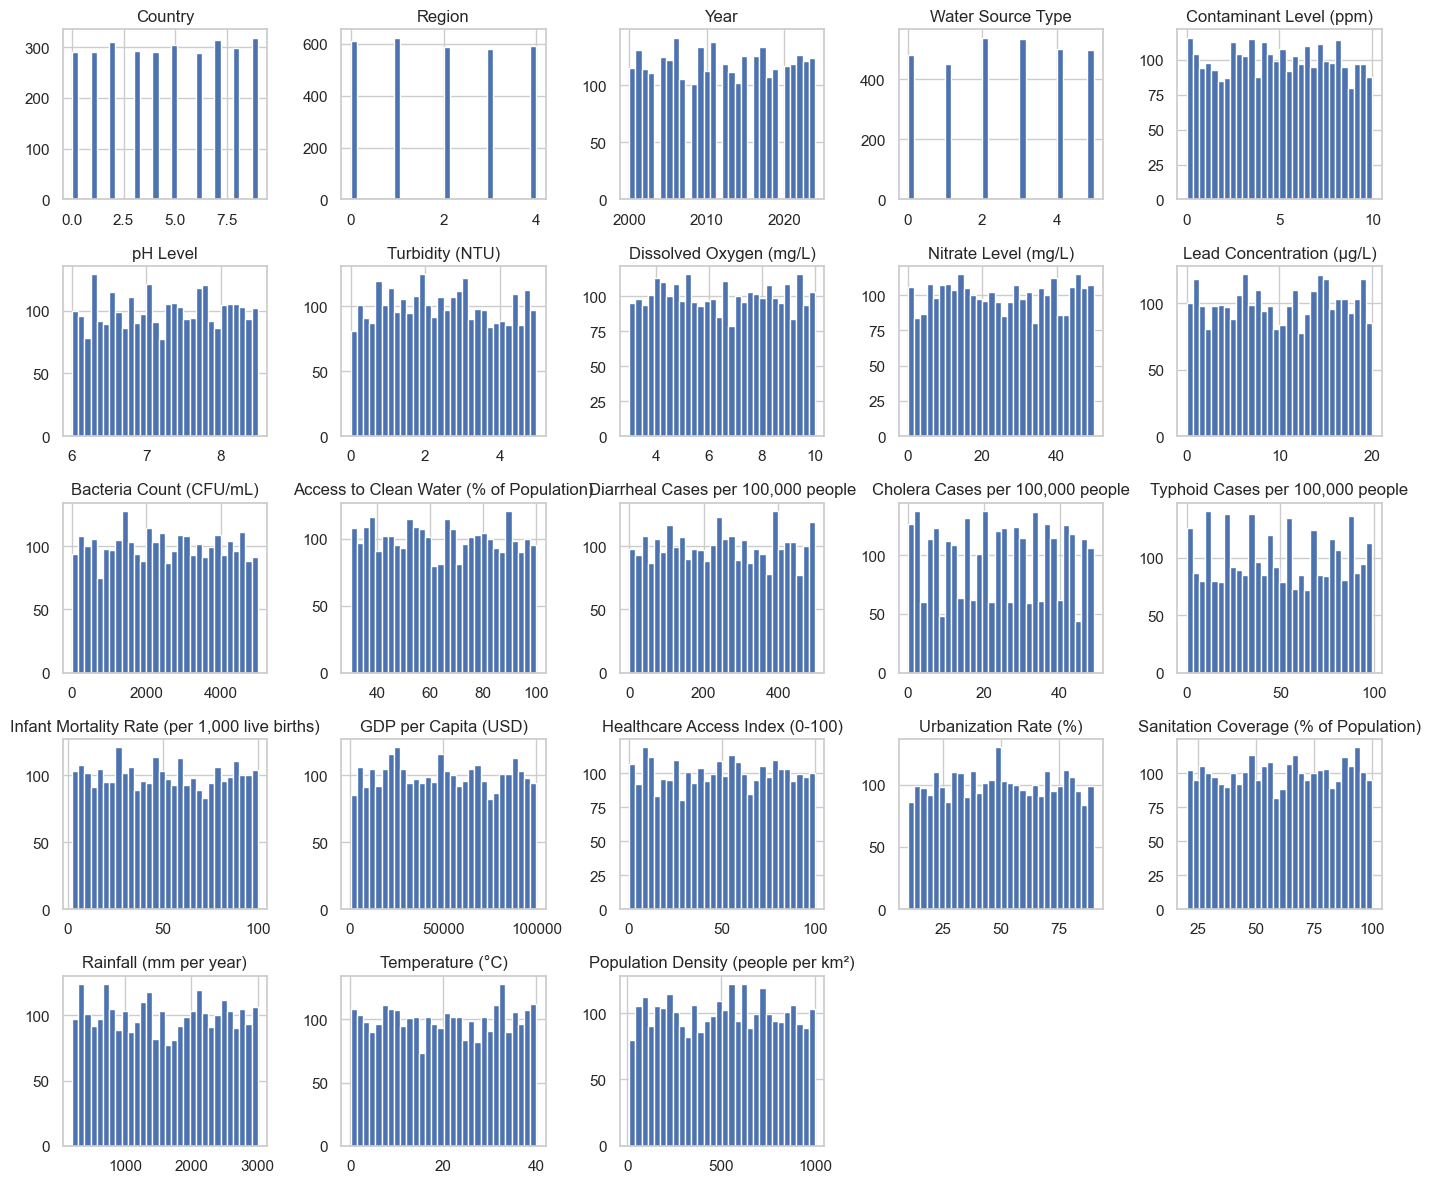

In [10]:
numeric_cols = data.select_dtypes(include=np.number).columns

data[numeric_cols].hist(figsize=(14,12), bins=30)
plt.tight_layout()
plt.show()


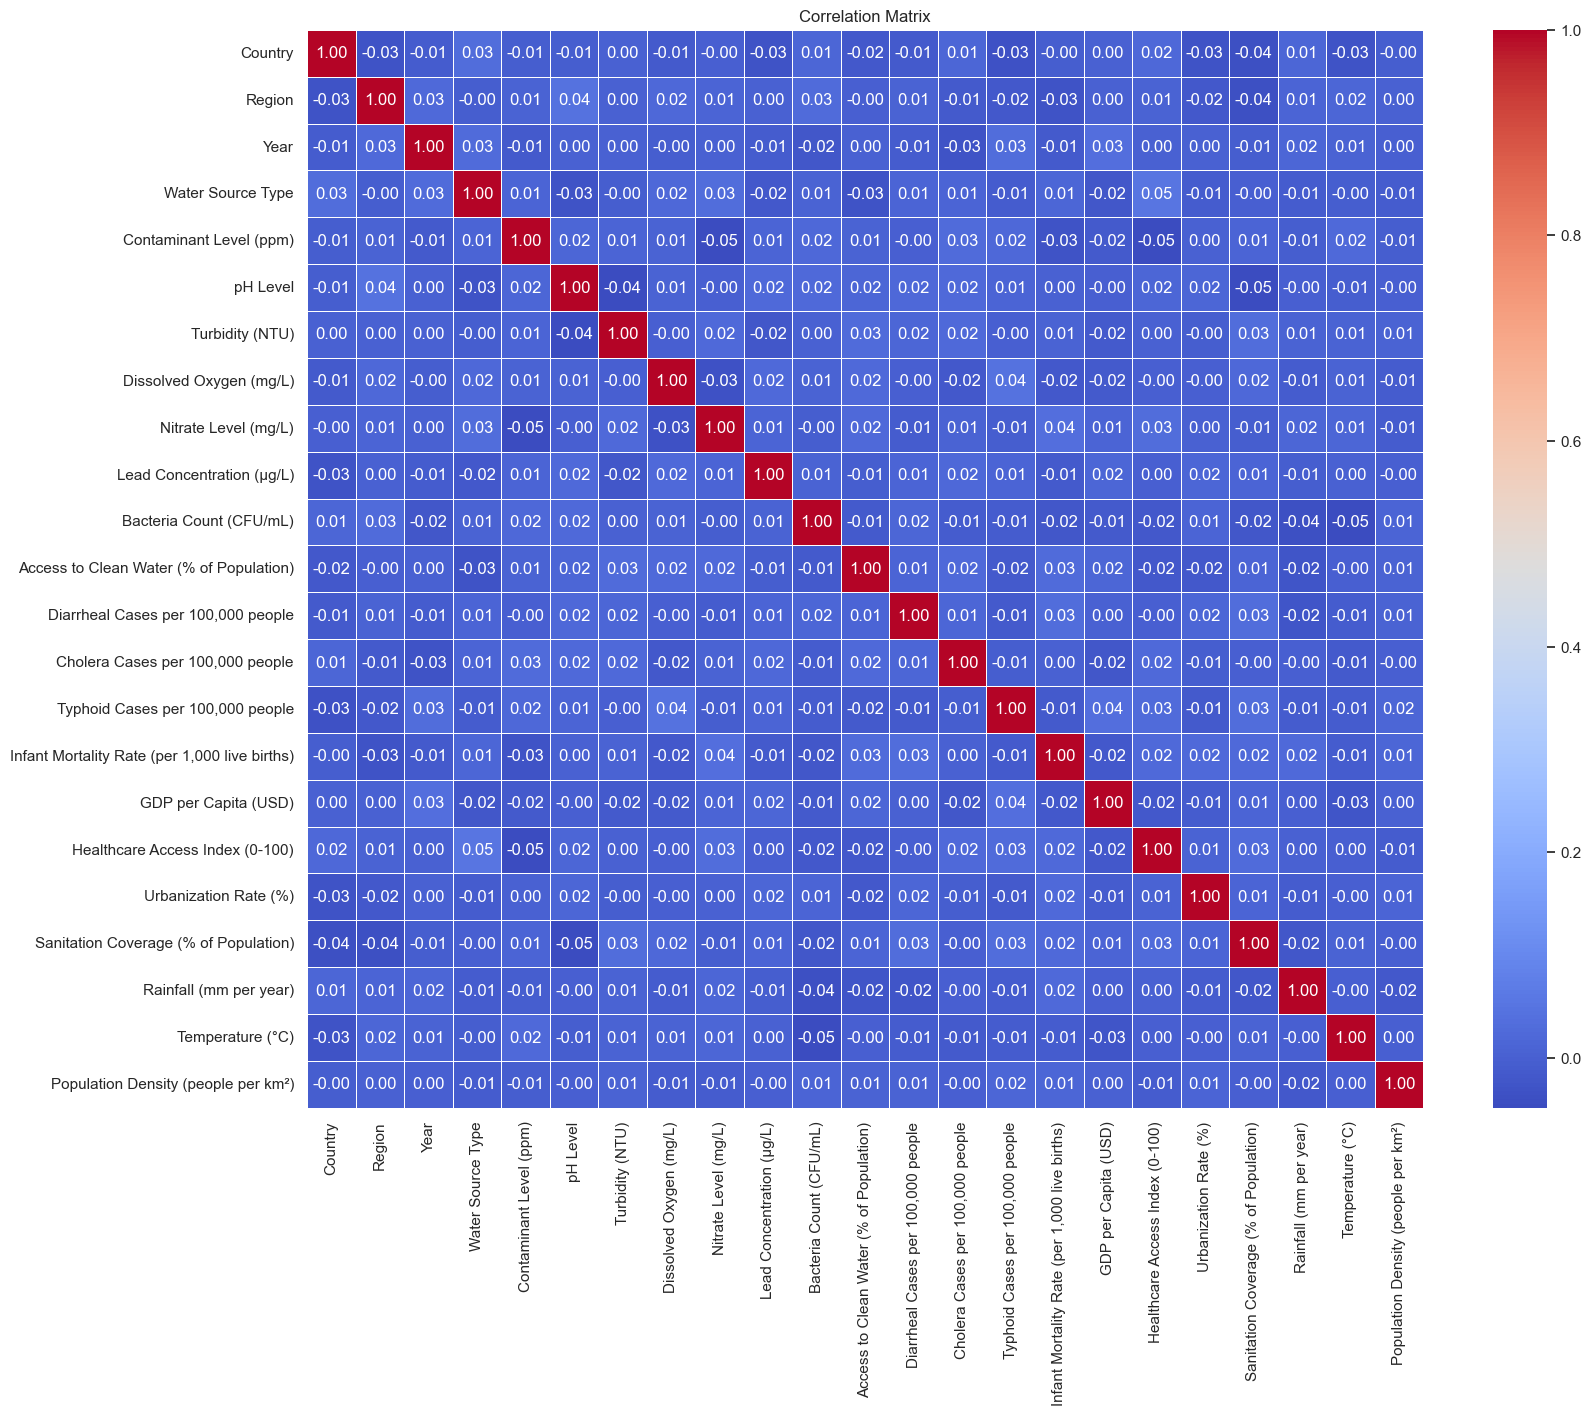

In [11]:
plt.figure(figsize=(18,14))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


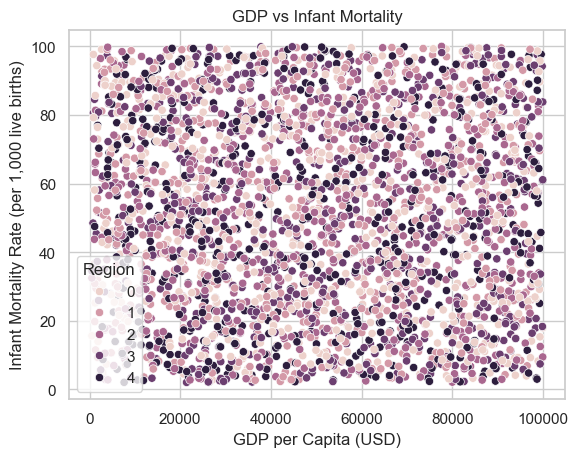

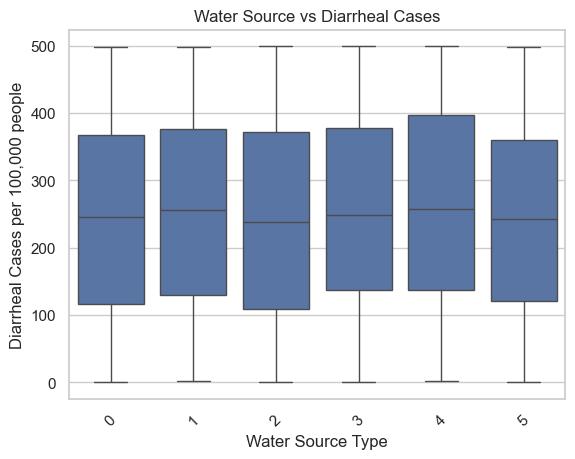

In [12]:

sns.scatterplot(data=data, x='GDP per Capita (USD)', y='Infant Mortality Rate (per 1,000 live births)', hue='Region')
plt.title("GDP vs Infant Mortality")
plt.show()

sns.boxplot(data=data, x='Water Source Type', y='Diarrheal Cases per 100,000 people')
plt.title("Water Source vs Diarrheal Cases")
plt.xticks(rotation=45)
plt.show()


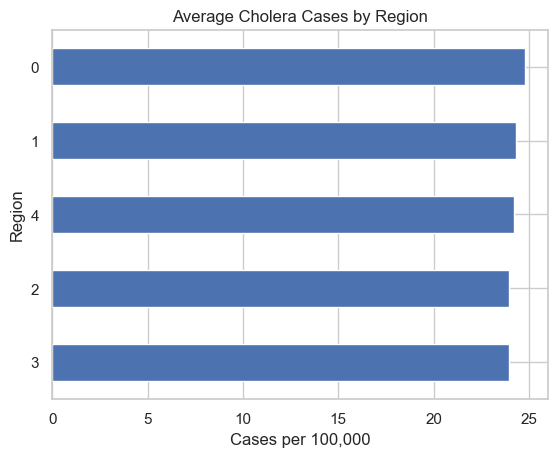

In [13]:
data.groupby('Region')['Cholera Cases per 100,000 people'].mean().sort_values().plot(kind='barh')
plt.title('Average Cholera Cases by Region')
plt.xlabel('Cases per 100,000')
plt.show()


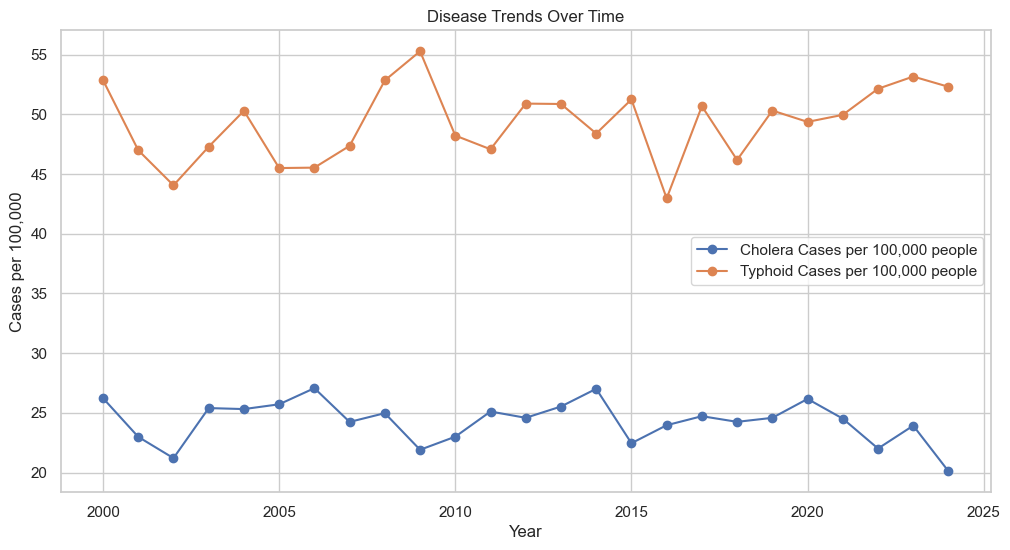

In [14]:
df_grouped = data.groupby('Year')[['Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people']].mean()
df_grouped.plot(marker='o', figsize=(12,6))
plt.title("Disease Trends Over Time")
plt.ylabel("Cases per 100,000")
plt.grid(True)
plt.show()

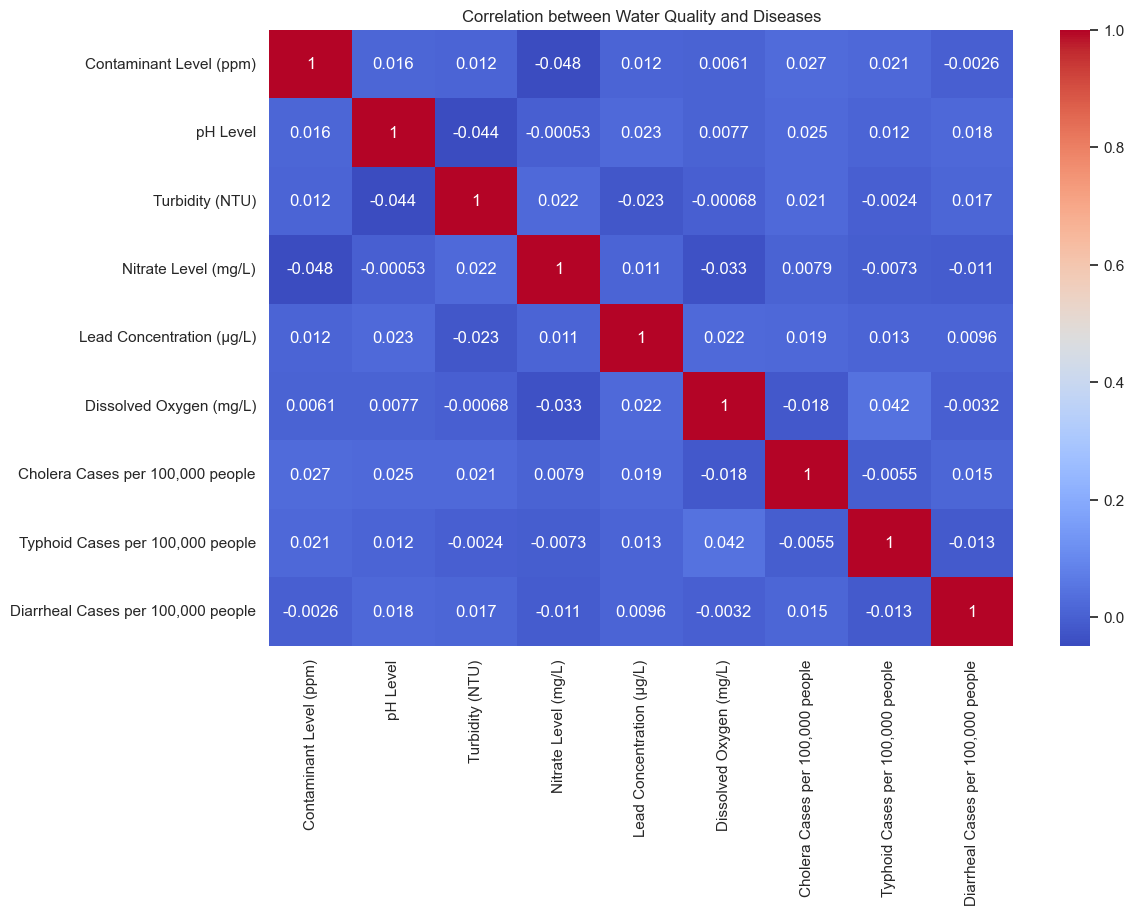

In [15]:
disease_cols = ['Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people', 'Diarrheal Cases per 100,000 people']
water_quality = ['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Dissolved Oxygen (mg/L)']

subset = data[water_quality + disease_cols]
plt.figure(figsize=(12,8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Water Quality and Diseases")
plt.show()


# PCA 

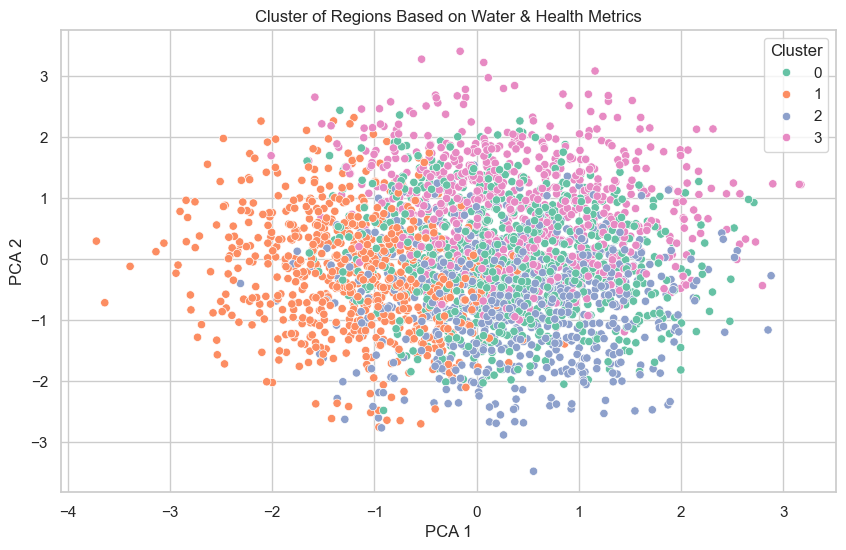

In [16]:


features = data[water_quality + disease_cols]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=clusters, palette='Set2')
plt.title("Cluster of Regions Based on Water & Health Metrics")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


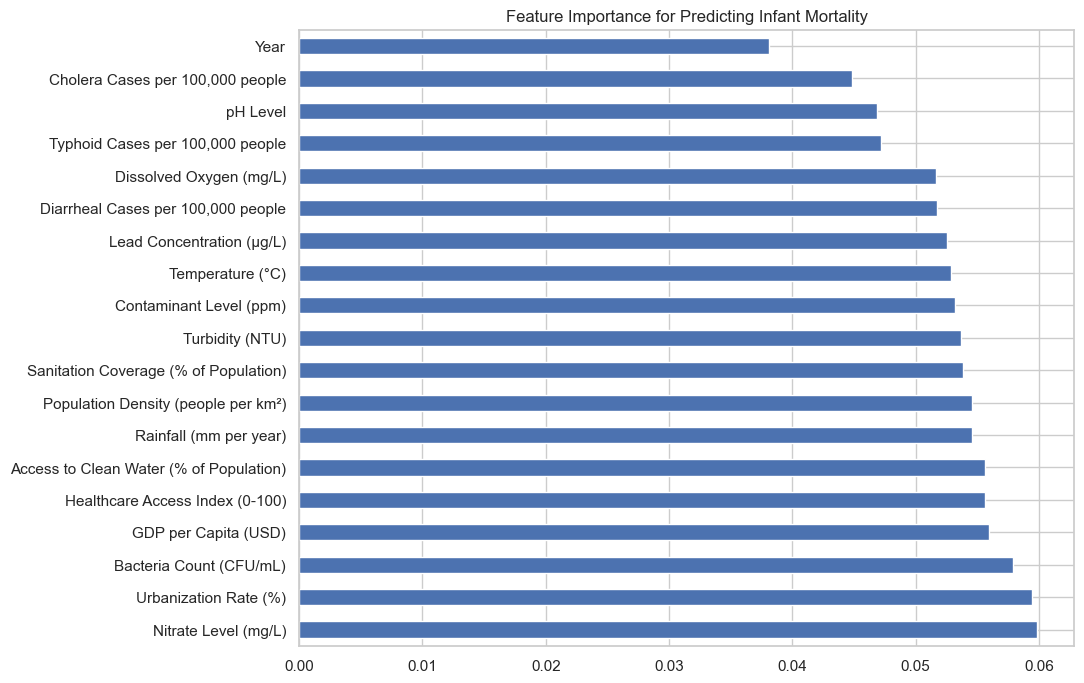

In [17]:
X = data.drop(columns=['Infant Mortality Rate (per 1,000 live births)', 'Country', 'Region', 'Water Source Type'])
y = data['Infant Mortality Rate (per 1,000 live births)']

X = X.select_dtypes(include=np.number).fillna(0)

model = RandomForestRegressor()
model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.plot(kind='barh', figsize=(10,8), title="Feature Importance for Predicting Infant Mortality")
plt.show()
